In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_2018 = pd.read_csv('2018.csv', index_col=0)

### Fill missing value by -1

In [3]:
df_2018.fillna(int(-1), inplace=True)
df_2018.isnull().sum()

code    0
dia     0
cd      0
hoa     0
khtn    0
khxh    0
su      0
anh     0
van     0
sinh    0
toan    0
li      0
city    0
dtype: int64

In [4]:
df_2018.index

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              ...
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             dtype='float64', length=744396)

In [5]:
df_2018.reset_index(drop=True, inplace=True)

In [6]:
df_2018.index

RangeIndex(start=0, stop=744396, step=1)

In [7]:
df_2018.head()

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
0,18010226,6.50,8.25,-1.0,-1.00,5.92,3.0,3.0,3.75,-1.0,3.0,-1.00,18
1,18010229,9.00,8.25,-1.0,-1.00,7.75,6.0,9.0,7.50,-1.0,8.8,-1.00,18
2,18010232,-1.00,-1.00,5.5,5.42,-1.00,-1.0,4.0,5.50,5.0,6.0,5.75,18
3,18010242,4.75,7.25,-1.0,-1.00,5.17,3.5,2.6,5.75,-1.0,3.4,-1.00,18
4,18010247,6.25,8.00,-1.0,-1.00,5.92,3.5,3.0,6.75,-1.0,3.8,-1.00,18


# Cá nhân

In [8]:
code_HaGiang = 5
df_HaGiang = df_2018[df_2018.city == code_HaGiang]
df_HaGiang

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city
47345,5002915,5.25,4.25,-1.00,-1.00,3.92,2.25,3.4,2.00,-1.00,1.4,-1.00,5
47346,5000921,6.75,7.75,3.75,4.58,5.75,2.75,2.4,4.75,3.50,5.6,6.50,5
47347,5000863,3.75,5.25,2.75,2.75,3.83,2.50,4.0,3.50,2.75,3.8,2.75,5
47348,5000867,5.00,6.75,3.50,2.92,5.33,4.25,3.0,2.75,3.25,2.4,2.00,5
47349,5000909,-1.00,-1.00,3.25,5.08,-1.00,-1.00,9.6,3.25,3.00,9.4,9.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50439,5003209,4.50,6.25,-1.00,-1.00,5.00,4.25,2.6,4.00,-1.00,2.6,-1.00,5
50440,5003213,4.50,4.50,-1.00,-1.00,4.08,3.25,2.6,3.75,-1.00,2.8,-1.00,5
50441,5003217,3.25,6.00,-1.00,-1.00,4.25,3.50,1.4,2.75,-1.00,4.0,-1.00,5
50442,5003220,4.75,6.25,-1.00,-1.00,4.33,2.00,3.0,3.25,-1.00,2.0,-1.00,5


### Kiểm tra điểm khoa học tự nhiên và khoa học xã hội giữa Hà Giang và toàn quốc

In [9]:
khtn_HaGiang = df_HaGiang[df_HaGiang.khtn != -1.00]['khtn'].sort_values()
khtn_ToanQuoc = df_2018[df_2018.khtn != -1.00]['khtn'].sort_values()

khxh_HaGiang = df_HaGiang[df_HaGiang.khxh != -1.00]['khxh'].sort_values() 
khxh_ToanQuoc = df_2018[df_2018.khxh != -1.00]['khxh'].sort_values() 

* So sánh phân bố điểm khoa học tự nhiên giữa Hà Giang và toàn quốc

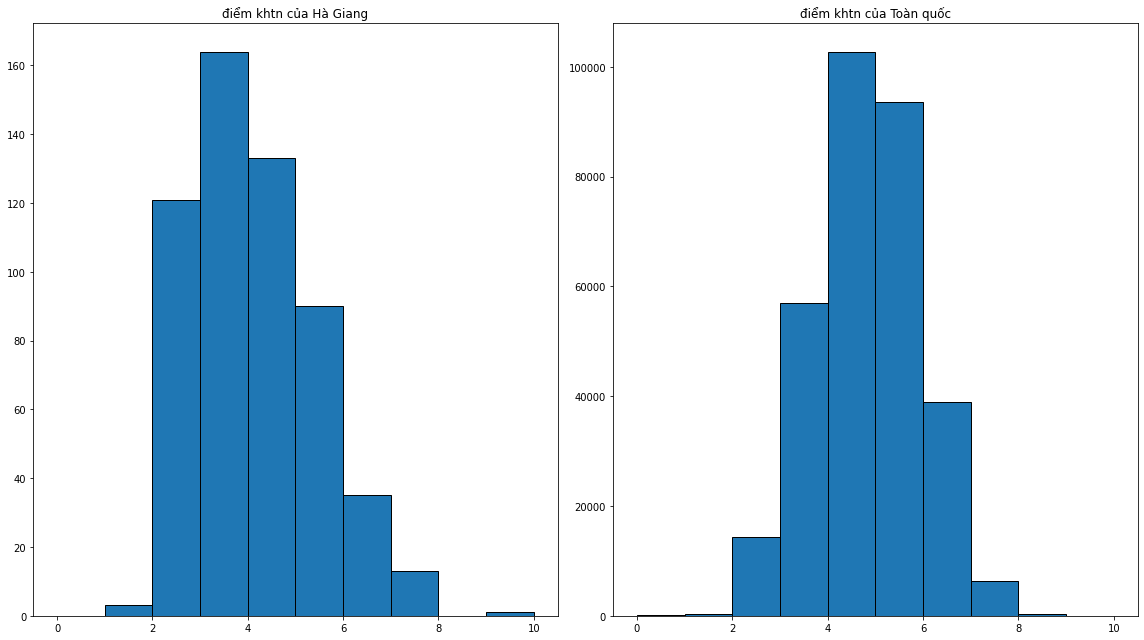

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16,9), sharey=False, tight_layout=True)
nbins = np.arange(0,11,1)
axs[0].hist(khtn_HaGiang.values, bins=nbins, edgecolor='black')
axs[0].set_title('điểm khtn của Hà Giang')
axs[1].hist(khtn_ToanQuoc.values, bins = nbins, edgecolor='black')
axs[1].set_title('điểm khtn của Toàn quốc')
plt.show()

* So sánh phân bố điểm khoa học xã hội giữa Hà Giang và toàn quốc

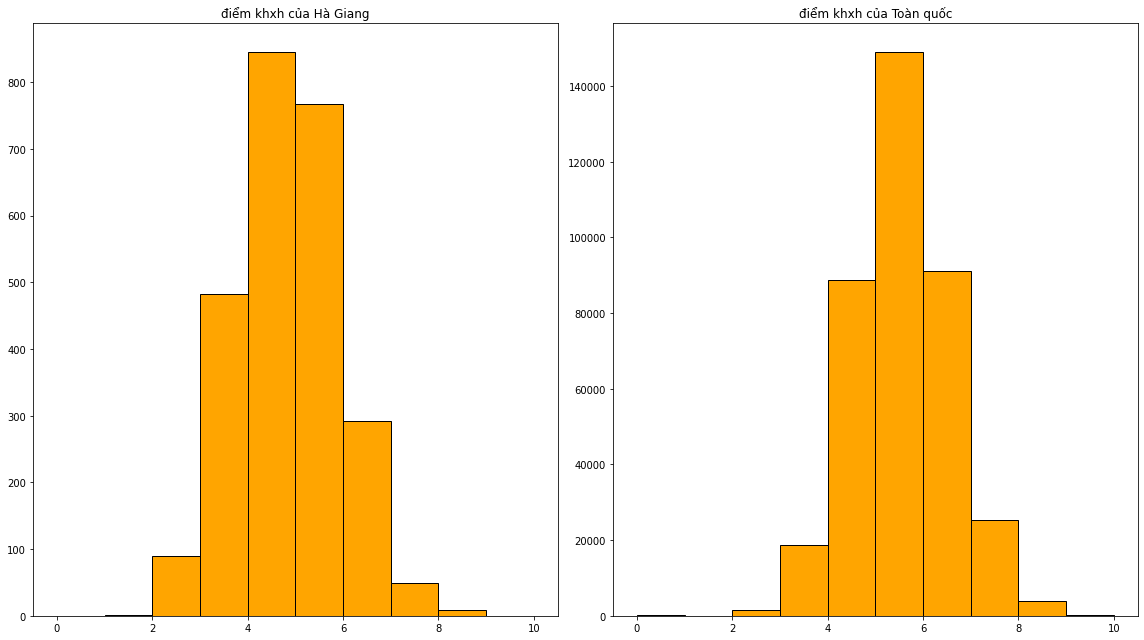

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16,9), sharey=False, tight_layout=True)
nbins = np.arange(0,11,1)
axs[0].hist(khxh_HaGiang.values, bins=nbins, color='orange', edgecolor='black')
axs[0].set_title('điểm khxh của Hà Giang')
axs[1].hist(khxh_ToanQuoc.values, bins=nbins, color='orange', edgecolor='black')
axs[1].set_title('điểm khxh của Toàn quốc')
fig.tight_layout()
plt.show()

### Nhìn 2 đồ thị trên thì ta vẫn chưa thấy gì bất thường, bây giờ ta thử xem xét tỉ lệ điểm trên 9 các môn, các khối thi giữa Hà Giang và toàn quốc

#### 1. Đầu tiên, ta tạo các cột điểm các khối A, B, C, D

In [12]:
dict_type = {'A': ['toan', 'li', 'hoa'], 
             'B': ['toan', 'hoa', 'sinh'],
             'C': ['van', 'su', 'dia'],
             'D': ['toan', 'li', 'anh']}
def get_score(x):
    if -1 in x.values:
        return -1
    return x.values.mean()
    
for key, value in dict_type.items():
    print(key, value)
    df_2018[key] = df_2018[value].apply(get_score, axis=1)
df_2018.head()

A ['toan', 'li', 'hoa']
B ['toan', 'hoa', 'sinh']
C ['van', 'su', 'dia']
D ['toan', 'li', 'anh']


,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city,A,B,C,D
0,18010226,6.50,8.25,-1.0,-1.00,5.92,3.0,3.0,3.75,-1.0,3.0,-1.00,18,-1.00,-1.0,4.416667,-1.00
1,18010229,9.00,8.25,-1.0,-1.00,7.75,6.0,9.0,7.50,-1.0,8.8,-1.00,18,-1.00,-1.0,7.500000,-1.00
2,18010232,-1.00,-1.00,5.5,5.42,-1.00,-1.0,4.0,5.50,5.0,6.0,5.75,18,5.75,5.5,-1.000000,5.25
3,18010242,4.75,7.25,-1.0,-1.00,5.17,3.5,2.6,5.75,-1.0,3.4,-1.00,18,-1.00,-1.0,4.666667,-1.00
4,18010247,6.25,8.00,-1.0,-1.00,5.92,3.5,3.0,6.75,-1.0,3.8,-1.00,18,-1.00,-1.0,5.500000,-1.00


In [13]:
df_HaGiang = df_2018[df_2018.city == 5]
df_HaGiang

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city,A,B,C,D
47345,5002915,5.25,4.25,-1.00,-1.00,3.92,2.25,3.4,2.00,-1.00,1.4,-1.00,5,-1.000000,-1.000000,3.166667,-1.000000
47346,5000921,6.75,7.75,3.75,4.58,5.75,2.75,2.4,4.75,3.50,5.6,6.50,5,5.283333,4.283333,4.750000,4.833333
47347,5000863,3.75,5.25,2.75,2.75,3.83,2.50,4.0,3.50,2.75,3.8,2.75,5,3.100000,3.100000,3.250000,3.516667
47348,5000867,5.00,6.75,3.50,2.92,5.33,4.25,3.0,2.75,3.25,2.4,2.00,5,2.633333,3.050000,4.000000,2.466667
47349,5000909,-1.00,-1.00,3.25,5.08,-1.00,-1.00,9.6,3.25,3.00,9.4,9.00,5,7.216667,5.216667,-1.000000,9.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50439,5003209,4.50,6.25,-1.00,-1.00,5.00,4.25,2.6,4.00,-1.00,2.6,-1.00,5,-1.000000,-1.000000,4.250000,-1.000000
50440,5003213,4.50,4.50,-1.00,-1.00,4.08,3.25,2.6,3.75,-1.00,2.8,-1.00,5,-1.000000,-1.000000,3.833333,-1.000000
50441,5003217,3.25,6.00,-1.00,-1.00,4.25,3.50,1.4,2.75,-1.00,4.0,-1.00,5,-1.000000,-1.000000,3.166667,-1.000000
50442,5003220,4.75,6.25,-1.00,-1.00,4.33,2.00,3.0,3.25,-1.00,2.0,-1.00,5,-1.000000,-1.000000,3.333333,-1.000000


#### 2. Xem tỉ lệ điểm trên 9 giữa tỉnh Hà Giang và trên toàn quốc
##### công thức: 
$$ \frac{n}{m}* 100 % $$
* n: số lượng thí sinh điểm từ 8 trở lên của địa bàn đang xét
* m: số lượng thí sinh địa bàn đang xét
* ***note( địa bàn đang xét ở đây có thể là một tỉnh, một miền hoặc toàn quốc)

In [14]:
# Số lượng thí sinh có điểm từ 9 trở lên ở tất cả các khối của Hà Giang
count_HaGiang_g9 = df_HaGiang.loc[(df_HaGiang.A >= 9) | (df_HaGiang.B >= 9) | (df_HaGiang.C >= 9) 
                                  | (df_HaGiang.D >= 9)].shape[0]

# phần trăm số lượng thí sinh có điểm từ 9 trở lên ở tất cả các khối của Hà Giang
ratio_HaGiang = count_HaGiang_g9 / df_HaGiang.shape[0]*100

# Số lượng thí sinh có điểm tử 8 trở lên ở tất cả các khối của Toàn quốc
count_ToanQuoc_g9 = df_2018.loc[(df_2018.A >= 9) | (df_2018.B >= 9) | (df_2018.C >= 9) 
                                  | (df_2018.D >= 9)].shape[0]

# phần trăm số lượng thí sinh có điểm từ 8 trở lên ở tất cả các khối của Toàn quốc
ratio_2018 = count_ToanQuoc_g9 / df_2018.shape[0]*100


In [15]:
count_HaGiang_g9

29

In [16]:
count_ToanQuoc_g9

209

In [17]:
ratio_HaGiang

0.935785737334624

In [18]:
ratio_2018

0.028076453930434876

#### Để ý thấy rằng tỉ lệ điểm trên 9 ở Hà Giang lớn hơn rất nhiều so với toàn quốc. Năm thi 2018 số lượng thí sinh có điểm trung bình ở các khối thi trên 9 khá ít, chỉ xét riêng 3 khối A, B, C, D thì chỉ có 209 thí sinh (theo dữ liệu). Lưu ý rằng dữ liệu ở đây chưa đầy đủ 100%, chỉ có khoảng 80% nhưng cũng đủ để ta đánh giá. 
### ==> ý tưởng: ta sẽ so sánh tỉ lệ phầm trăm số lượng trên 9 của các tỉnh theo từng môn
##### Ta xây dựng công thức độ đo ``accu``đánh giá dựa vào các tiêu chí phụ thuộc:
###### - `m`: Số lượng thí sinh trên 9 của tỉnh đó
###### - `M`: Tổng thí sinh của tỉnh đó
###### - `n`: Số lượng thí sinh trên 9 của toàn quốc
###### - `N`: Số lượng thí sinh trên toàn quốc
###### * Lưu ý: số lượng thí sinh ở đây là chỉ tính cho một khối thi
##### Công thức: $$accu = \frac{m}{M}*\frac{n}{N}$$


In [19]:
df_2018.head()

,code,dia,cd,hoa,khtn,khxh,su,anh,van,sinh,toan,li,city,A,B,C,D
0,18010226,6.50,8.25,-1.0,-1.00,5.92,3.0,3.0,3.75,-1.0,3.0,-1.00,18,-1.00,-1.0,4.416667,-1.00
1,18010229,9.00,8.25,-1.0,-1.00,7.75,6.0,9.0,7.50,-1.0,8.8,-1.00,18,-1.00,-1.0,7.500000,-1.00
2,18010232,-1.00,-1.00,5.5,5.42,-1.00,-1.0,4.0,5.50,5.0,6.0,5.75,18,5.75,5.5,-1.000000,5.25
3,18010242,4.75,7.25,-1.0,-1.00,5.17,3.5,2.6,5.75,-1.0,3.4,-1.00,18,-1.00,-1.0,4.666667,-1.00
4,18010247,6.25,8.00,-1.0,-1.00,5.92,3.5,3.0,6.75,-1.0,3.8,-1.00,18,-1.00,-1.0,5.500000,-1.00


In [20]:
# Số lượng thí sinh trên 9 của toàn quốc tính các khối A, B, C, D
n_total_g9 = (df_2018[['A', 'B', 'C', 'D']] >= 9).any(axis=1).sum()

# Số lượng thí sinh của Toàn quốc
n_total = df_2018.shape[0]

In [21]:
def get_accuracy(x):
    # Số lượng thí sinh trên 9 của x(tỉnh)
    m = (x[['A', 'B', 'C', 'D']] >= 9).any(axis=1).sum()
    
    #Số lượng thí sinh của x(tỉnh)
    M = len(x)
    
    return (m/M*n_total_g9/n_total)*100
    return m
    
    
df_accu = df_2018.groupby('city').apply(get_accuracy)

In [22]:
top_accu = df_accu.sort_values(ascending=False)[0:10]

<AxesSubplot:xlabel='city'>

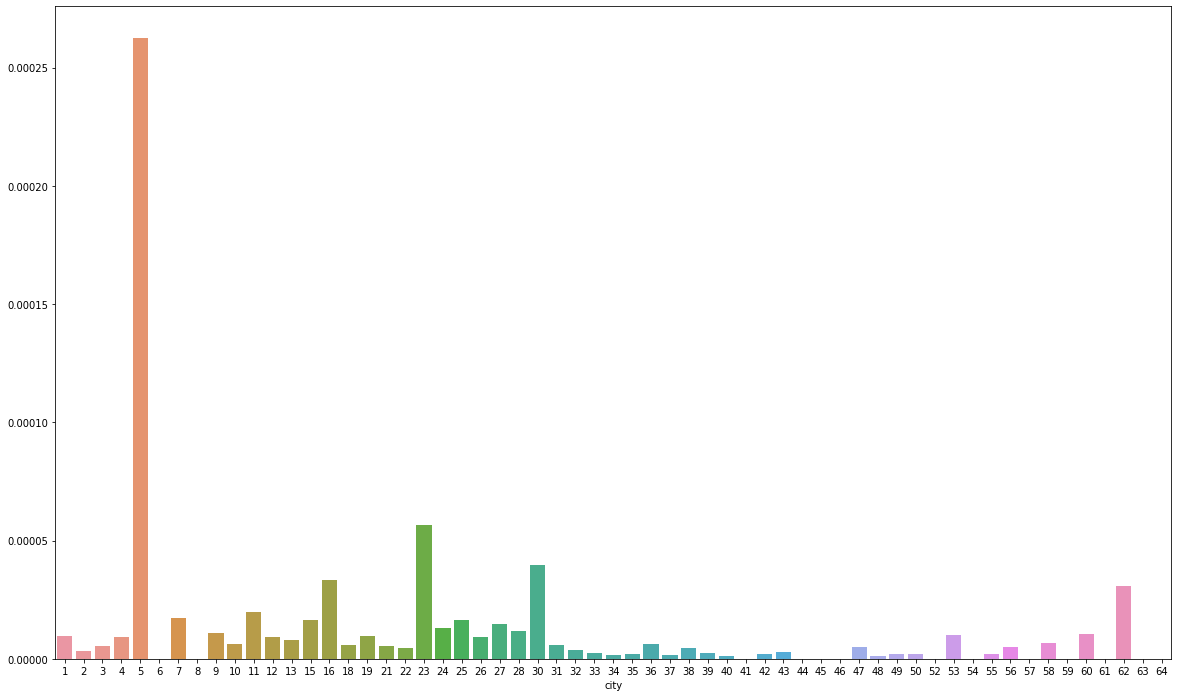

In [23]:
plt.figure(figsize=(20,12))
sns.barplot(x=df_accu.index, y=df_accu.values)

In [24]:
df_accu.idxmax()

5